In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6

In [4]:
dataset=pd.read_csv('BrentOilPrices.csv')
#parse string to datetime
dataset['Date']=pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])

In [5]:
indexedDataset

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


In [9]:
from datetime import datetime
indexedDataset.tail(5)

,Price
Date,
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68
2021-01-22,55.22
2021-01-25,55.44


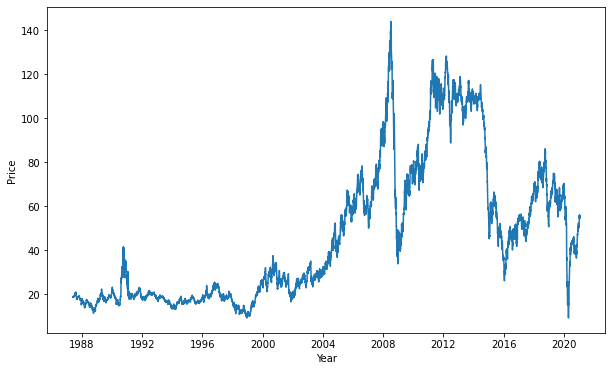

In [11]:
plt.xlabel("Year")
plt.ylabel("Price")
plt.plot(indexedDataset)

In [14]:
# Determining Rolling Stastics
rolmean=indexedDataset.rolling(window=365).mean()
rolstd=indexedDataset.rolling(window=365).std()
print(rolmean,rolstd)

                Price
Date                 
1987-05-20        NaN
1987-05-21        NaN
1987-05-22        NaN
1987-05-25        NaN
1987-05-26        NaN
...               ...
2021-01-19  48.024438
2021-01-20  48.013123
2021-01-21  48.003945
2021-01-22  47.989205
2021-01-25  47.977233

[8554 rows x 1 columns]                 Price
Date                 
1987-05-20        NaN
1987-05-21        NaN
1987-05-22        NaN
1987-05-25        NaN
1987-05-26        NaN
...               ...
2021-01-19  13.748365
2021-01-20  13.740352
2021-01-21  13.734090
2021-01-22  13.723418
2021-01-25  13.714980

[8554 rows x 1 columns]


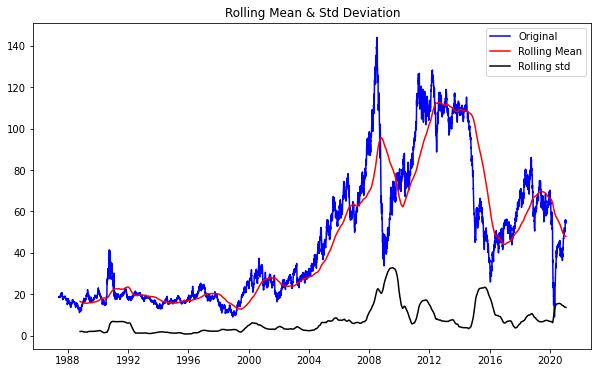

In [17]:
# Plot Rolling Stastics
orig=plt.plot(indexedDataset, color='blue',label='Original')
mean=plt.plot(rolmean, color='red',label='Rolling Mean')
std=plt.plot(rolstd, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title("Rolling Mean & Std Deviation")
plt.show(block=False)

In [19]:
# Perform Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller
print("Result Of Dicky Fuller Test:")
dftest=adfuller(indexedDataset['Price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Stastics','P-Value','#Lags used','Number Of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Result Of Dicky Fuller Test:
Test Stastics                    -2.119950
P-Value                           0.236569
#Lags used                       29.000000
Number Of Observations Used    8524.000000
Critical Value (1%)              -3.431117
Critical Value (5%)              -2.861879
Critical Value (10%)             -2.566951
dtype: float64


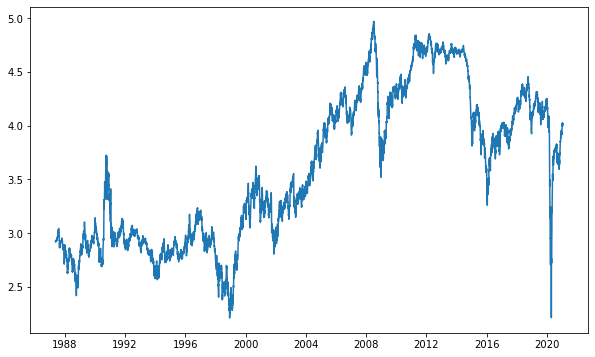

In [21]:
# Estimating Trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [55]:
indexedDataset_logScale = dataset.set_index('Date').asfreq('D')
indexedDataset_logScale.dropna(inplace=True)

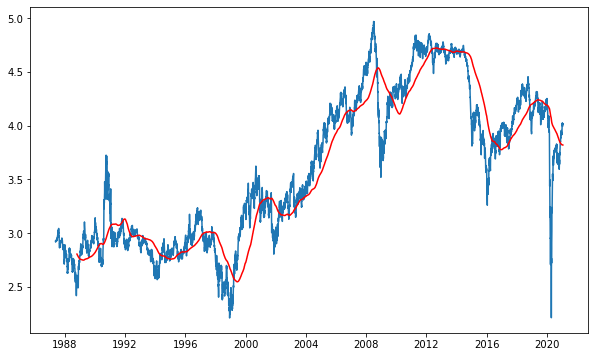

In [23]:
MovingAverage=indexedDataset_logScale.rolling(window=365).mean()
MovingStd=indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(MovingAverage,color='red')

In [24]:
datasetLogscaleMinusMovingAverage=indexedDataset_logScale-MovingAverage
datasetLogscaleMinusMovingAverage.head(10)
#Dropping Null Values
datasetLogscaleMinusMovingAverage.dropna(inplace=True)
datasetLogscaleMinusMovingAverage.head(10)

,Price
Date,
1988-10-20,-0.200361
1988-10-21,-0.200957
1988-10-24,-0.299595
1988-10-25,-0.308305
1988-10-26,-0.307122
1988-10-27,-0.285507
1988-10-28,-0.262779
1988-10-31,-0.261712
1988-11-01,-0.294457


In [25]:
# Creating Fuction to check series is stationary or not
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    # Determing rolling statistics
    rolmean=timeseries.rolling(window=365).mean()
    rolstd=timeseries.rolling(window=365).std()
    # Print rolling window statstics
    orig=plt.plot(timeseries, color='blue',label='Original')
    mean=plt.plot(rolmean, color='red',label='Rolling Mean')
    std=plt.plot(rolstd, color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Std Deviation")
    plt.show(block=False)
    
    # Perform Dicky-Fuller test
    print("Result Of Dicky Fuller Test:")
    dftest=adfuller(timeseries['Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Stastics','P-Value','#Lags used','Number Of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

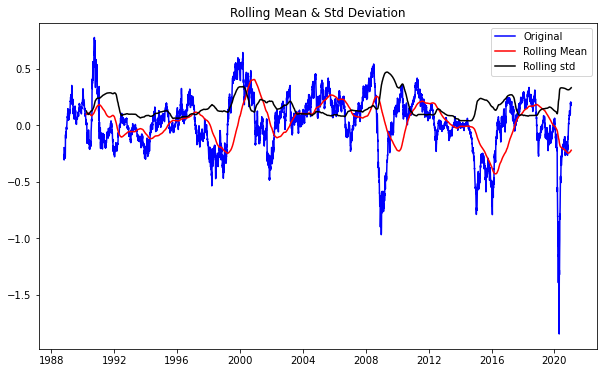

Result Of Dicky Fuller Test:
Test Stastics                 -5.704842e+00
P-Value                        7.529732e-07
#Lags used                     2.900000e+01
Number Of Observations Used    8.160000e+03
Critical Value (1%)           -3.431152e+00
Critical Value (5%)           -2.861894e+00
Critical Value (10%)          -2.566959e+00
dtype: float64


In [26]:
test_stationary(datasetLogscaleMinusMovingAverage)

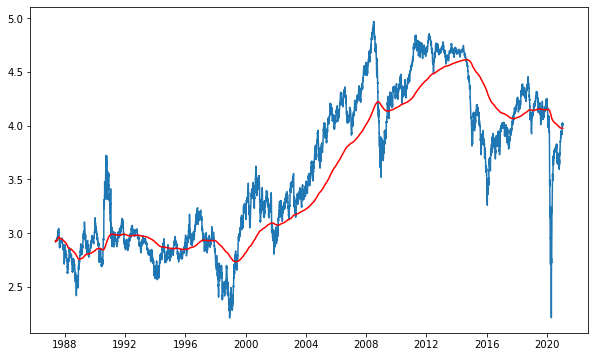

In [27]:
ExponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(ExponentialDecayWeightedAverage,color='red')

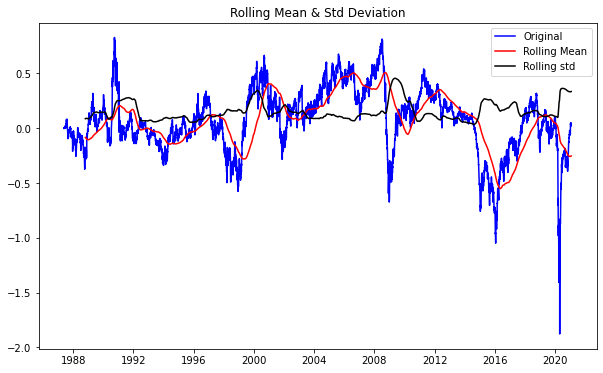

Result Of Dicky Fuller Test:
Test Stastics                    -4.602744
P-Value                           0.000128
#Lags used                       29.000000
Number Of Observations Used    8524.000000
Critical Value (1%)              -3.431117
Critical Value (5%)              -2.861879
Critical Value (10%)             -2.566951
dtype: float64


In [28]:
datasetlogscaleMinusMovingExponentialDecay_Average=indexedDataset_logScale-ExponentialDecayWeightedAverage
test_stationary(datasetlogscaleMinusMovingExponentialDecay_Average)

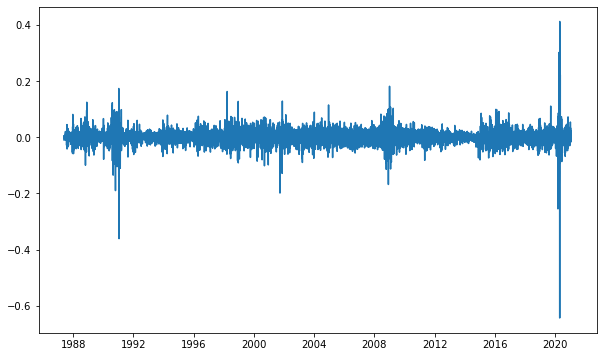

In [29]:
datasetLogDiffShifting=indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

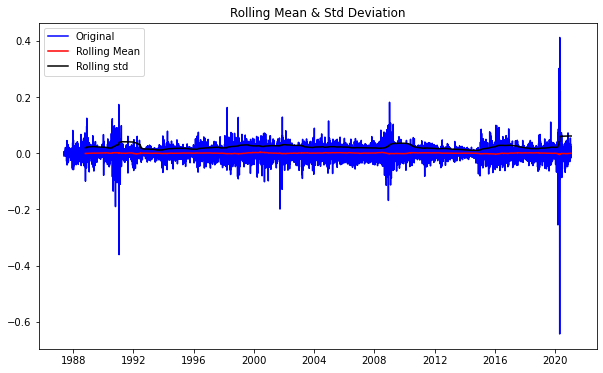

Result Of Dicky Fuller Test:
Test Stastics                 -1.600127e+01
P-Value                        6.507306e-29
#Lags used                     2.800000e+01
Number Of Observations Used    8.524000e+03
Critical Value (1%)           -3.431117e+00
Critical Value (5%)           -2.861879e+00
Critical Value (10%)          -2.566951e+00
dtype: float64


In [30]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [57]:
indexedDataset_logScale

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


<ipython-input-123-77971da9612b>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(indexedDataset_logScale, freq = 30)


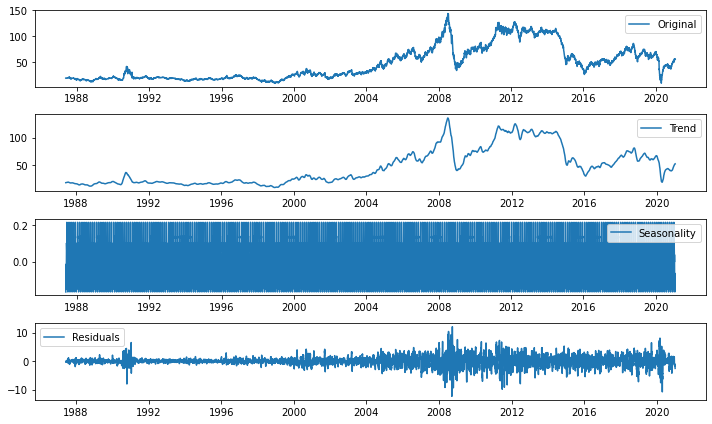

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [60]:
# ACF & PACF
from statsmodels.tsa.stattools import acf,pacf
lag_acf= acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

C:\Users\mangesh.kshirsagar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

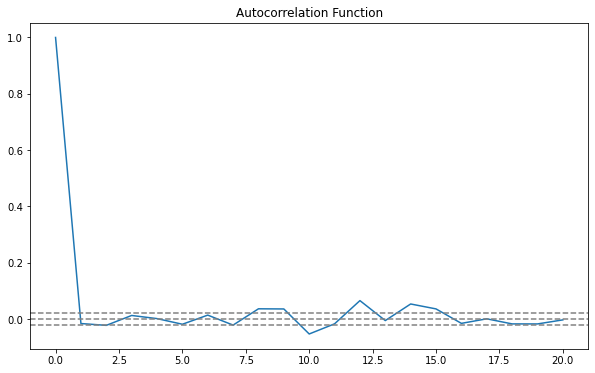

In [59]:
# Plot acf
plt.subplot()
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")

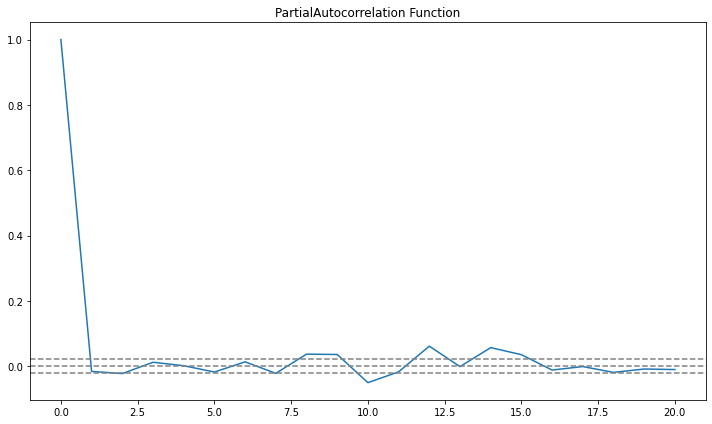

In [61]:
# Plot pacf
plt.subplot()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title("PartialAutocorrelation Function")
plt.tight_layout()

Plotting AR Model


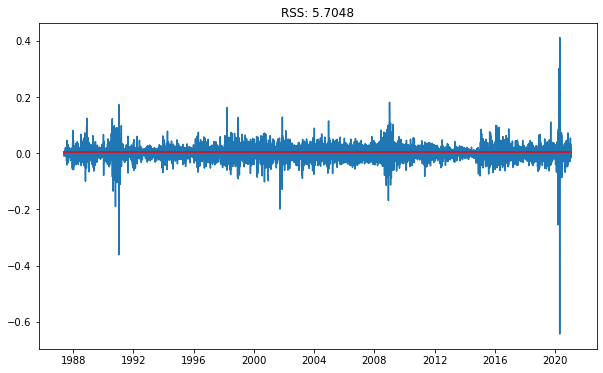

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(indexedDataset_logScale,order=(0,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Price'])**2))
print("Plotting AR Model")

Plotting AR Model


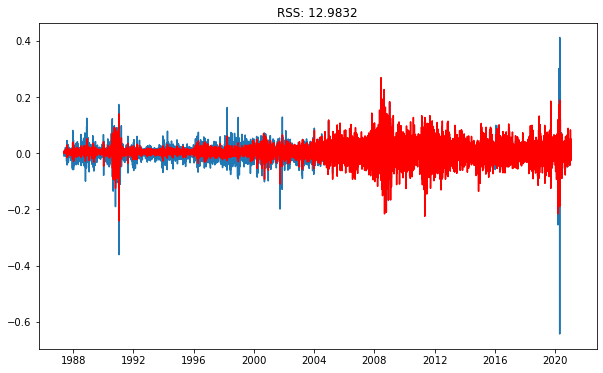

In [76]:
model=ARIMA(indexedDataset_logScale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Price'])**2))
print("Plotting AR Model")

In [77]:
prediction_ARIMADiff=pd.Series(results_AR.fittedvalues, copy=True)
print(prediction_ARIMADiff.head())

Date
1987-05-21    0.004304
1987-05-22   -0.000415
1987-05-25    0.008224
1987-05-26    0.004731
1987-05-27    0.004608
dtype: float64


In [78]:
# Cumsum
prediction_cumsum=prediction_ARIMADiff.cumsum()
prediction_cumsum.head()

Date
1987-05-21    0.004304
1987-05-22    0.003889
1987-05-25    0.012112
1987-05-26    0.016843
1987-05-27    0.021451
dtype: float64

In [80]:
prediction_ARIMA_log=pd.Series(indexedDataset_logScale["Price"],index=indexedDataset_logScale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(prediction_cumsum,fill_value=0)
prediction_ARIMA_log.head()

Date
1987-05-20    18.630000
1987-05-21    18.454304
1987-05-22    18.553889
1987-05-25    18.612112
1987-05-26    18.646843
dtype: float64

In [99]:
prediction_ARIMA_log

Date
1987-05-20    18.630000
1987-05-21    18.454304
1987-05-22    18.553889
1987-05-25    18.612112
1987-05-26    18.646843
                ...    
2021-01-19    92.149881
2021-01-20    92.468945
2021-01-21    92.491196
2021-01-22    92.033737
2021-01-25    92.245935
Length: 8554, dtype: float64

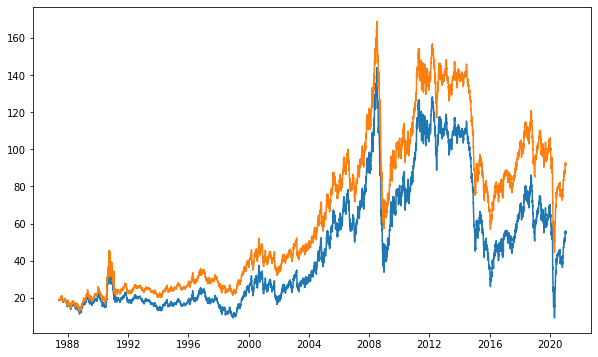

In [101]:
prediction_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA_log)

C:\Users\mangesh.kshirsagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


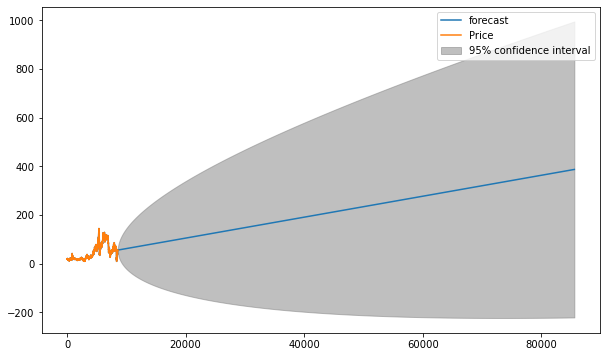

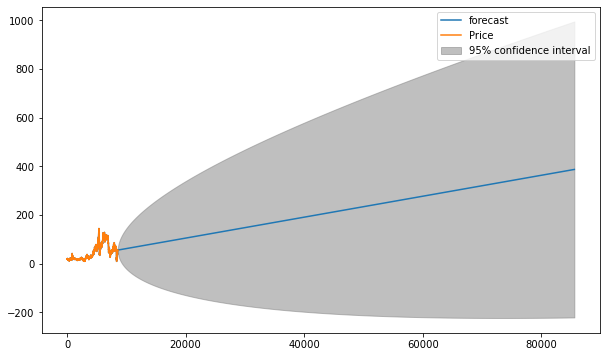

In [118]:
results_AR.plot_predict(1,85540)

C:\Users\mangesh.kshirsagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


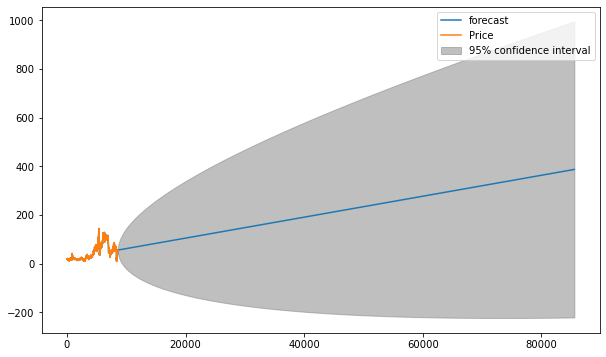

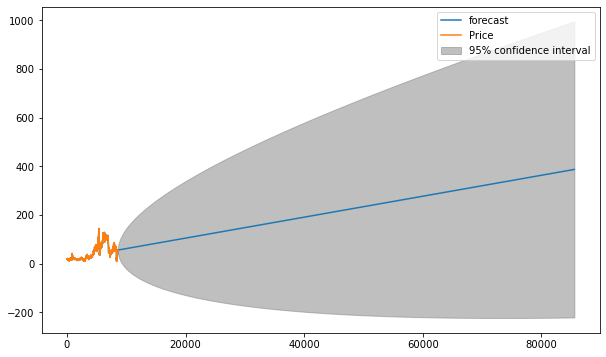

In [121]:
results_AR.plot_predict(5,85540)

C:\Users\mangesh.kshirsagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


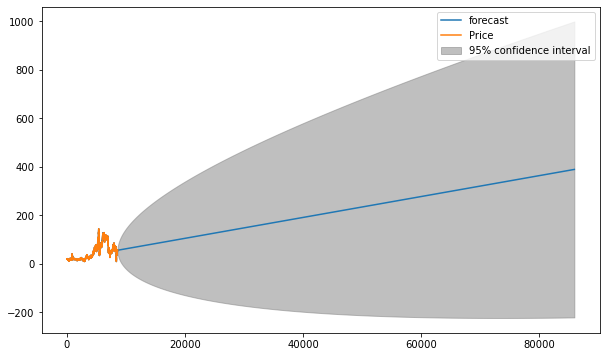

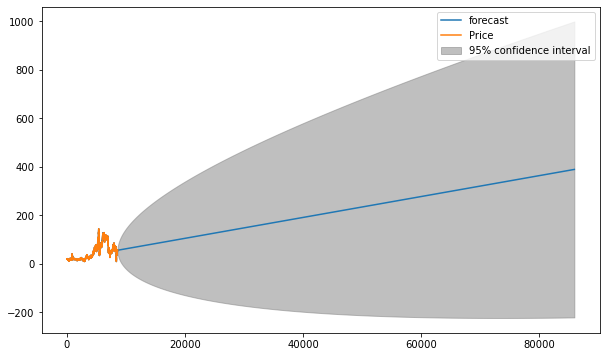

In [104]:
results_AR.plot_predict(10,85940)

In [114]:
x=results_AR.forecast(steps=120)

In [115]:
df = pd.DataFrame(x)

In [116]:
df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,55.4535,55.4564,55.4606,55.4649,55.4692,55.4735,55.4778,55.4821,55.4864,55.4907,...,55.9254,55.9297,55.934,55.9383,55.9426,55.9469,55.9512,55.9556,55.9599,55.9642
1,1.09803,1.57302,1.93012,2.23055,2.49509,2.73416,2.95394,3.15846,3.35053,3.53216,...,11.7788,11.8317,11.8845,11.9369,11.9892,12.0412,12.093,12.1446,12.1959,12.2471
2,"[53.30141897699453, 57.60562663783434]","[52.37330909145826, 58.539427713076414]","[51.67760172315258, 59.243523102045046]","[51.0930722855901, 59.83667811809835]","[50.578887073149836, 60.359473829017595]","[50.11463039452707, 60.832338748490656]","[49.6881717711382, 61.267405673070485]","[49.29161548483867, 61.67257027987493]","[48.919483278248336, 62.05331080699406]","[48.567789794200664, 62.41361261141924]",...,"[32.83941595360925, 79.01142680983892]","[32.739943468556824, 79.11950761526589]","[32.64093333016038, 79.22712607403689]","[32.5423794133832, 79.33428831118862]","[32.444275727243806, 79.44100031770256]","[32.34661641074398, 79.54726795457694]","[32.24939572895447, 79.653096956741]","[32.1526080692509, 79.75849293681911]","[32.05624793769303, 79.86346138875153]","[31.960309955540573, 79.96800769127853]"
